# Gaussians Illustration
Let's look at Gaussian Distribution function for single random variable and two random variables

Recall,
$N(X; \mu, \sigma) = p(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{\frac{-(x - \mu)^2}{2 \sigma^2}}$

$N(\textbf{X}; \mu, \Sigma) = p(\textbf{X}) = \frac{1}{(2 \pi)^{d/2} det(\Sigma) ^{\frac{1}{2}}} e^{-\frac{1}{2}(\textbf{X} - \mu)^T \Sigma^{-1}(\textbf{X} - \mu)}$

For Two Random Variables,

$N(\textbf{X}; \mu \Sigma) = p(\textbf{X}) = \frac{1}{2 \pi \times det(\Sigma) ^{\frac{1}{2}}} e^{-\frac{1}{2}(\textbf{X} - \mu)^T \Sigma^{-1}(\textbf{X} - \mu)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

In [2]:
def gaussian_1d(x, mu, std):
    return (1 / (sqrt(2 * pi) * std)) * np.exp(-(x - mu) ** 2 / (2 * std ** 2))

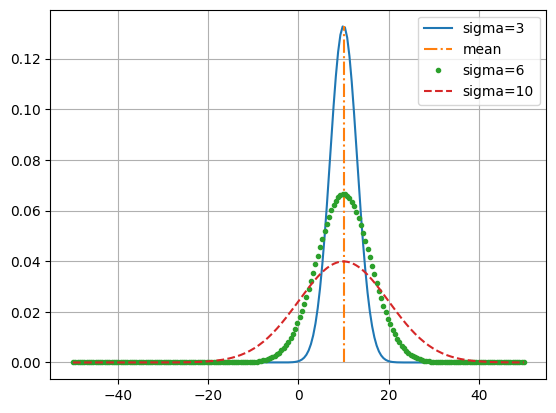

In [3]:
# 1D Gaussian Representation
x = np.linspace(-50, 50, 200)
mu = 10
std = 3
y = gaussian_1d(x, mu, std)
plt.plot(x,y, label='sigma=3')
plt.grid()

# Can also do the same using lambda function
px = lambda x,mu,std : (1 / (sqrt(2 * pi) * std)) * np.exp(-(x - mu) ** 2 / (2 * std ** 2))

# Show Mean
plt.plot([10, 10], [0, np.max(y)], '-.', label='mean')

# Show effect of changing variance
plt.plot(x, px(x, 10, 6), '.', label='sigma=6')
plt.plot(x, px(x, 10, 10), '--', label='sigma=10')
plt.legend()

# The 68-95-99.7 Rule
The standard deviation is a measure of how much the data deviates from the mean. For Gaussian distributions, 68% of all the data falls within one standard deviation ($\pm1\sigma$) of the mean, 95% falls within two standard deviations ($\pm2\sigma$), and 99.7% within three ($\pm3\sigma$). This is often called the 68-95-99.7 rule.

The mean and std has sam units as the underlying quantity.

In [4]:
def gaussian(x, mu, cov):
    assert(cov.shape[0] == cov.shape[1])
    d = np.size(cov) / cov.shape[0]
    return (1 / (2 * pi) ** (d / 2) * sqrt(np.linalg.det(cov))) * \
           np.exp(-(x - mu).T @ np.linalg.inv(cov) @ (x - mu) / 2)

In [5]:
def gaussian1(x, mu, cov):
    assert(cov.shape[0] == cov.shape[1])
    d = np.size(cov) / cov.shape[0]
    return (1 / (2 * pi) * sqrt(np.linalg.det(cov))) * \
           np.exp(-(x - mu).T @ np.linalg.inv(cov) @ (x - mu) / 2)

In [6]:
%matplotlib widget

In [7]:
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)
X, Y = np.meshgrid(x,y)
mu = np.zeros((2,1))

In [8]:
def createGaussianDistData(cov):
    Z = np.zeros((np.size(y), np.size(x)))
    for i in range(np.size(y)):
        X_pts = X[i, :]
        Y_pts = Y[i, :]
        for j in range(np.size(X_pts)):
            x_j = X_pts[j]
            y_j = Y_pts[j]
            X_vec = np.array([[x_j], [y_j]])
            z_j = gaussian(X_vec, mu, cov)
            Z[i,j] = z_j
    print(np.size(y))
    return Z

100


Text(0.5, 0.5, 'Y')

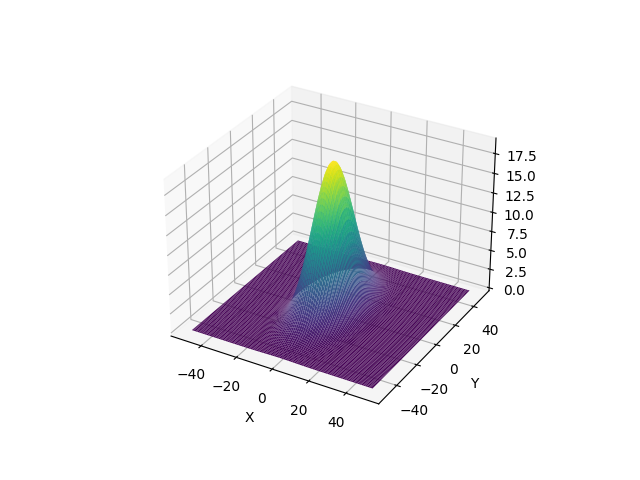

In [9]:
ax = plt.axes(projection='3d')
cov = np.array([[64, 0], [0, 225]])
ax.plot_surface(X, Y, createGaussianDistData(cov), rstride=1, cstride=1,cmap='viridis', edgecolor='none', antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [15]:
def createGaussianDistData1(cov):
    Z1 = np.zeros((np.size(y), np.size(x)))
    for i in range(np.size(y)):
        X_pts = X[i, :]
        Y_pts = Y[i, :]
        for j in range(np.size(X_pts)):
            x_j = X_pts[j]
            y_j = Y_pts[j]
            X_vec = np.array([[x_j], [y_j]])
            z_j = gaussian1(X_vec, mu, cov)
            Z[i,j] = z_j
    print(np.size(y))
    return Z1

In [18]:
ax = plt.axes(projection='3d')
cov = np.array([[64, 0], [0, 225]])
ax.plot_surface(X, Y, createGaussianDistData1(cov), rstride=1, cstride=1,cmap='viridis', edgecolor='none', antialiased=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')

100


Text(0.5, 0.5, 'Y')

100


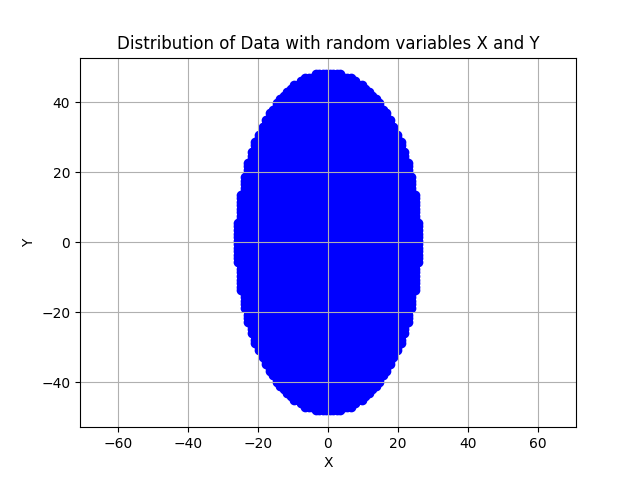

In [17]:
plt.figure()
plt.grid()
cov = np.array([[64, 0], [0, 225]])
Z = createGaussianDistData(cov)

# Show data where there is density
for i in range(np.size(y)):
    point_dist = [(x[j], y[i]) for j in range(0,np.size(x),1) if np.abs(Z[i,j]) > 0.1]
    x_2d = [p[0] for p in point_dist]
    y_2d = [p[1] for p in point_dist]
    plt.scatter(x_2d, y_2d, color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.title('Distribution of Data with random variables X and Y')
plt.show()